In [1]:
import data_loading
import preprocessing  
import training
from used_models import models, models_names
import predict

### Data Ingestion

In [2]:
df = data_loading.read_table_to_df(table_name="CHURN_TRAIN_TEST_DATASET")
df

Data from CHURN_TRAIN_TEST_DATASET loaded successfully!


,RowNumber,CustomerId,Surname,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,1968,15598088,Ni,25,163221.22,0.00,559.0,2,Spain,Male,True,True,False
1,4126,15633378,Davidson,49,178342.63,0.00,692.0,2,Spain,Female,True,False,False
2,5850,15608873,Smith,51,53353.36,0.00,665.0,1,France,Male,False,False,False
3,4135,15684147,Palerma,43,79649.62,102338.19,678.0,1,France,Male,True,True,False
4,8130,15729246,Hardacre,31,76326.67,0.00,847.0,2,Spain,Male,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2536,15578809,Hao,40,174434.06,134760.21,651.0,2,Germany,Male,False,False,True
4995,9427,15675518,Charlton,53,144849.10,75225.53,499.0,2,Spain,Female,False,False,True
4996,4608,15734524,Wang,51,170426.65,0.00,653.0,1,France,Male,True,False,True
4997,540,15762729,Ukaegbunam,28,73275.96,111071.36,745.0,1,Germany,Female,True,False,True


### Data Prepocessing

In [3]:
target_col = 'Exited'

df = preprocessing.drop_cols(df, cols_list=['RowNumber','CustomerId','Surname'])
df = preprocessing.change_datatype_cols(df, cols_list=['HasCrCard', 'IsActiveMember', 'Exited'], datatypes= [int, int, int])
df = preprocessing.encode_cols(df, cols_list=['Gender', 'Geography'])
df =  preprocessing.binning_cols(df, cols_list=['CreditScore'], new_cols_list=['Segment'], datatypes= [int], labels=[['1', '2', '3']] , num_categories=[3])
X, y = preprocessing.balance_dataset(X=df.drop(columns=[target_col])  , y=df[target_col])
X =  preprocessing.standardize_dataset(X=X)
X

array([[-1.59630428,  1.07282134, -1.34172581, ...,  0.77547899,
         1.32153861, -0.27808898],
       [ 0.78395192,  1.33486225, -1.34172581, ...,  0.77547899,
        -0.75669374,  1.38293462],
       [ 0.9823066 , -0.83109334, -1.34172581, ..., -1.28952559,
        -0.75669374, -0.27808898],
       ...,
       [ 0.9823066 ,  0.12278363, -1.34172581, ..., -1.28952559,
        -0.75669374, -1.93911258],
       [ 0.58559724, -0.36310847,  0.44715847, ...,  0.77547899,
         1.32153861, -0.27808898],
       [ 2.07325736, -0.41663157, -0.60177055, ...,  0.77547899,
        -0.75669374,  1.38293462]])

### Model Training & Testting

c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [14:23:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


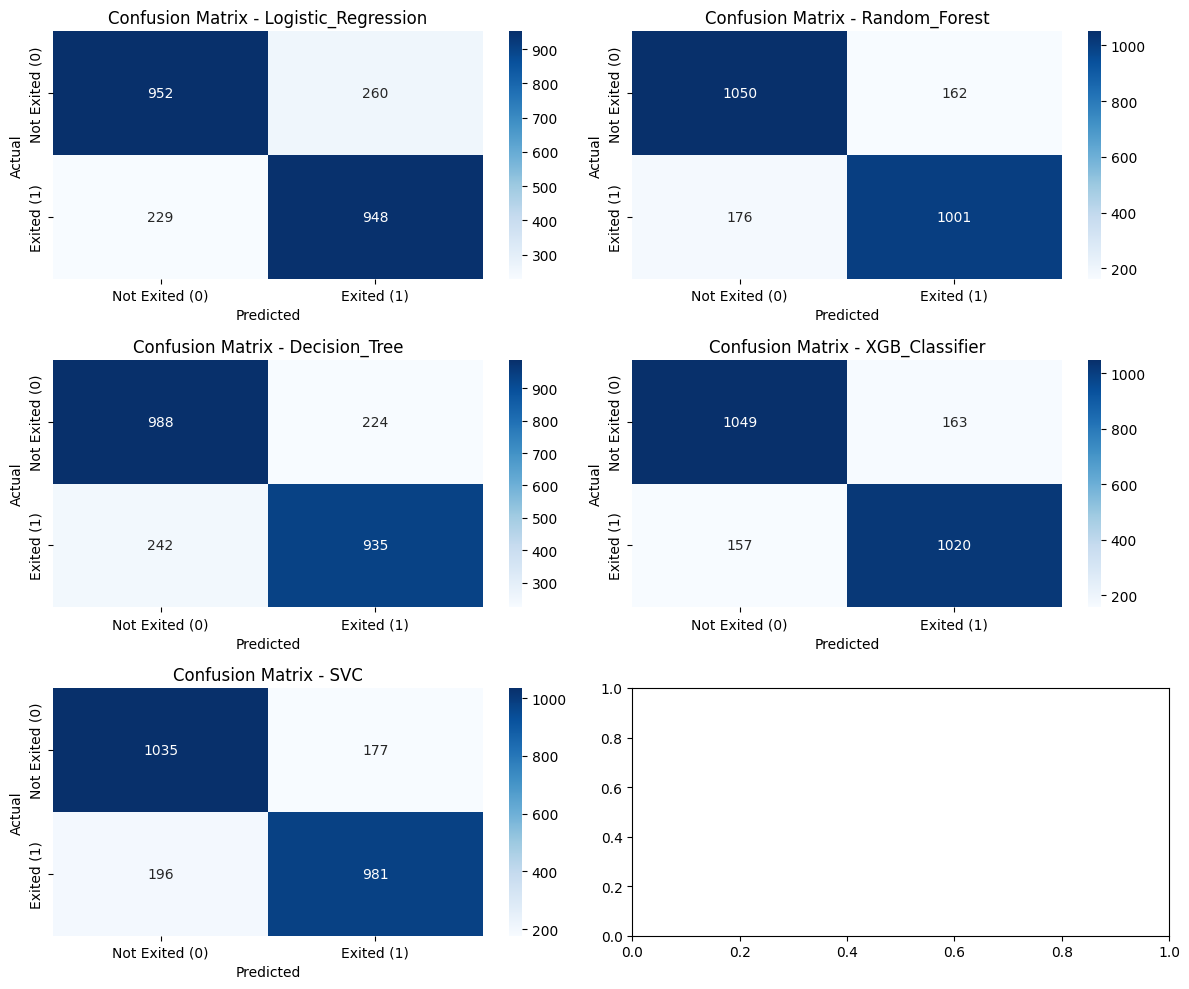

In [4]:
X_train, X_test, y_train, y_test = training.split_data(X=X, y=y)
trained_models, y_preds = training.train_models(models, X_train, X_test, y_train)
results_df = training.evaluate_models(models_names, y_test, y_preds)
plt =  training.ptl_cm(models_names, y_test, y_preds)
training.save_model(trained_models, models_names, path='model_pickles')

In [5]:
results_df

,Model,Accuracy,Precision_Exited_1,Recall_Exited_1,F1_Exited_1
0,XGB_Classifier,0.866053,0.862215,0.866610,0.864407
1,Random_Forest,0.858518,0.860705,0.850467,0.855556
2,SVC,0.843868,0.847150,0.833475,0.840257
3,Logistic_Regression,0.795312,0.784768,0.805438,0.794969
4,Decision_Tree,0.804939,0.806730,0.794393,0.800514


### Ingest Simulation Data

In [6]:
df_sim = data_loading.read_table_to_df(table_name="USER_SIM_DATASET")
df_orig = df_sim.copy()
df_sim

Data from USER_SIM_DATASET loaded successfully!


,RowNumber,CustomerId,Surname,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts,Geography,Gender,HasCrCard,IsActiveMember
0,6528,15722692,Kazakova,38,75574.48,116439.65,464.0,1,France,Male,True,False
1,9760,15790093,Aguirre,27,125451.01,0.00,627.0,2,France,Female,True,False
2,6850,15775678,Uspensky,44,152108.47,0.00,716.0,1,France,Female,True,True
3,1795,15606841,Ibbott,38,156603.70,0.00,823.0,2,France,Male,True,False
4,8534,15768566,K?,34,37479.97,0.00,706.0,2,France,Male,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4484,15774192,Miller,38,80575.44,105435.74,539.0,1,Germany,Female,False,False
4997,2432,15782247,Yeh,22,186233.26,0.00,540.0,3,France,Male,True,True
4998,4593,15658475,Lori,36,89983.02,142882.49,834.0,1,France,Male,True,False
4999,2782,15641416,Shaffer,61,157527.60,94867.18,732.0,2,Germany,Female,True,True


### Data Prepocessing

In [7]:
df_sim = preprocessing.drop_cols(df_sim, cols_list=['RowNumber','CustomerId','Surname'])
df_sim = preprocessing.change_datatype_cols(df_sim, cols_list=['HasCrCard', 'IsActiveMember'], datatypes= [int, int])
df_sim = preprocessing.encode_cols(df_sim, cols_list=['Gender', 'Geography'])
df_sim = preprocessing.binning_cols(df_sim, cols_list=['CreditScore'], new_cols_list=['Segment'], datatypes= [int], labels=[['1', '2', '3']] , num_categories=[3])
df_sim

,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts,Geography,Gender,HasCrCard,IsActiveMember,Segment
0,38,75574.48,116439.65,464.0,1,0,1,1,0,1
1,27,125451.01,0.00,627.0,2,0,0,1,0,2
2,44,152108.47,0.00,716.0,1,0,0,1,1,3
3,38,156603.70,0.00,823.0,2,0,1,1,0,3
4,34,37479.97,0.00,706.0,2,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...
4996,38,80575.44,105435.74,539.0,1,1,0,0,0,2
4997,22,186233.26,0.00,540.0,3,0,1,1,1,2
4998,36,89983.02,142882.49,834.0,1,0,1,1,0,3
4999,61,157527.60,94867.18,732.0,2,1,0,1,1,3


### Prediction & Serving

In [8]:
df_pred = predict.predict(df_orig, df_sim, path='model_pickles/XGB_Classifier.pkl', columns=['Probability of 0', 'Probability of 1'])

data_loading.write_df_to_table(df_pred, "CHURN_PROBA")

DataFrame written to CHURN_PROBA successfully!


,RowNumber,CustomerId,Surname,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts,Geography,Gender,HasCrCard,IsActiveMember,Probability of 0,Probability of 1
0,6528,15722692,Kazakova,38,75574.48,116439.65,464.0,1,France,Male,True,False,0.0,1.0
1,9760,15790093,Aguirre,27,125451.01,0.00,627.0,2,France,Female,True,False,0.9,0.1
2,6850,15775678,Uspensky,44,152108.47,0.00,716.0,1,France,Female,True,True,0.8,0.2
3,1795,15606841,Ibbott,38,156603.70,0.00,823.0,2,France,Male,True,False,0.9,0.1
4,8534,15768566,K?,34,37479.97,0.00,706.0,2,France,Male,True,True,0.9,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4484,15774192,Miller,38,80575.44,105435.74,539.0,1,Germany,Female,False,False,0.4,0.6
4997,2432,15782247,Yeh,22,186233.26,0.00,540.0,3,France,Male,True,True,0.2,0.8
4998,4593,15658475,Lori,36,89983.02,142882.49,834.0,1,France,Male,True,False,0.4,0.6
4999,2782,15641416,Shaffer,61,157527.60,94867.18,732.0,2,Germany,Female,True,True,0.8,0.2


In [9]:
counts = df_pred['Probability of 1'].value_counts().sort_index()
counts

Probability of 1
0.1    1296
0.2     657
0.3     100
0.4     850
0.6    1073
0.7     429
0.8     113
0.9     196
1.0     287
Name: count, dtype: int64